<a href="https://colab.research.google.com/github/WarunaDissanayake1234/Gold-Price-Prediction-Model/blob/main/Gold_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependancies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Pre Processing

In [2]:
# loading the dataset
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# let's look at first five rows
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Row and Columns
gold_dataset.shape

(2290, 6)

In [6]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# let's check the missing values
gold_dataset.isnull().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [48]:
# let's understanding the corralation between features
correlation = gold_dataset.corr()

<ipython-input-48-d86a11b117ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

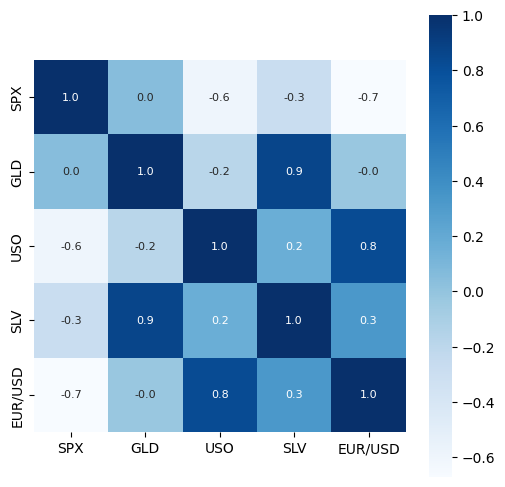

In [51]:
# Constructing a heapmap to understand the correelation
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [52]:
# Correlation Vlaues of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


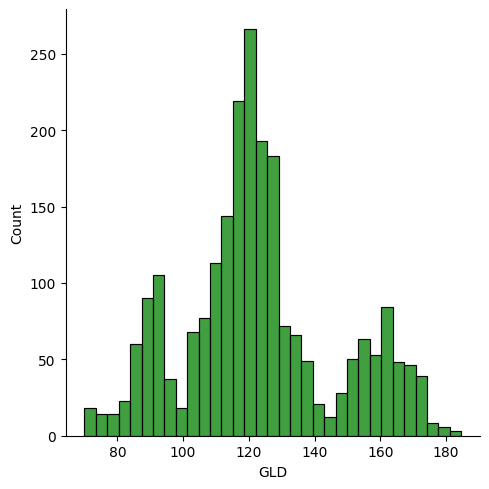

In [61]:
# Checking the distribution of the GLD price
sns.displot(gold_dataset['GLD'],color='green')

Splitting the Features and Target

In [53]:
X= gold_dataset.drop(['GLD','Date'], axis=1)
Y= gold_dataset['GLD']

In [54]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into Training data and Test data

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
print(X.shape, X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Lets Train the model

In [57]:
# loading the model
model = RandomForestRegressor()

In [58]:
#Training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

Evaluation the model

In [59]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [40]:
print(training_data_prediction)

[109.9264979  114.77970085  90.75380006 ... 130.38109627 159.74019561
 114.89409973]


In [41]:
# R squared error
R_score = metrics.r2_score(Y_train, training_data_prediction)

# Mean absolute Error
M_score = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Squared Error : ', R_score)
print('Mean Absolute Erroe: ', M_score)

R Squared Error :  0.9984381503338694
Mean Absolute Erroe:  0.4877148907096037


Visualizeing the actual Prices and predicted prices

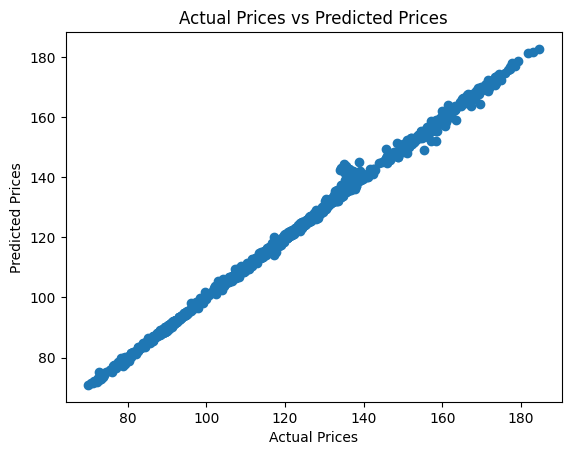

In [42]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [43]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[168.56949952  82.00380005 116.01060029 127.67240042 120.76620142
 154.66219755 150.0649989  126.18600014 117.44699862 125.85370056
 116.72570078 172.14190092 141.39229908 167.80279803 115.06850018
 117.86320056 138.06790314 170.16090137 159.81310281 161.31949881
 154.94819999 125.19560019 175.76060055 157.0406038  125.17230031
  93.94709969  77.22000045 120.9704999  119.19649964 167.39870024
  88.17200052 125.36010019  91.22700066 117.76649976 121.12059899
 136.31770087 115.42610102 115.25670049 149.11829982 107.392001
 104.49310227  87.27749775 126.52200025 117.9477002  153.3407993
 119.53520028 108.30240011 107.97289861  93.19320076 127.04839805
  74.69990041 113.669399   121.32760019 111.29539854 118.80329882
 120.62299912 158.73640082 168.96470107 147.16309739  85.99769867
  94.26370024  86.77969856  90.63840011 119.03440068 126.52610018
 127.49450022 168.87679964 122.30899939 117.34409896  98.30299994
 168.84900268 143.06849919 132.16130307 121.13140215 120.92149968
 119.72480077

In [44]:
# R squared error
R_score = metrics.r2_score(Y_test, test_data_prediction)

# Mean absolute Error
M_score = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Squared Error : ', R_score)
print('Mean Absolute Erroe: ', M_score)

R Squared Error :  0.9890309368899777
Mean Absolute Erroe:  1.3307574855021822


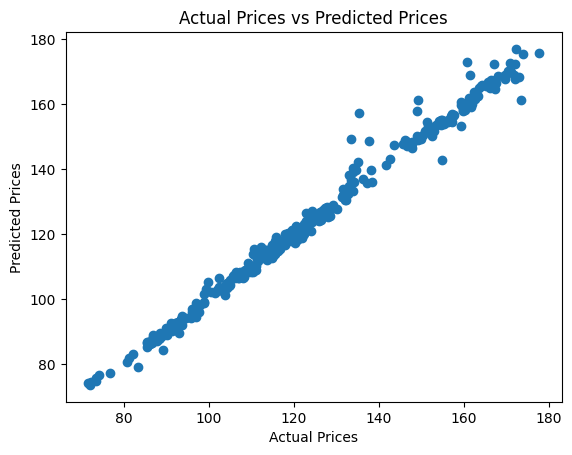

In [45]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Compare AP vs PP

In [62]:
Y_test = list(Y_test)

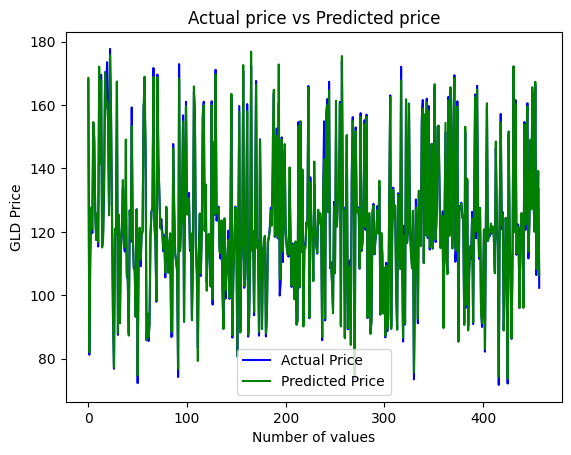

In [65]:
plt.plot(Y_test, color='blue', label = 'Actual Price')
plt.plot(test_data_prediction, color='green', label = 'Predicted Price')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()